### Bar Samplizing

In [1]:
from FinancialMachineLearning.barsampling.core import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

txt파일형식의 고빈도데이터를 csv파일 형태로 저장해두자

In [49]:
data = pd.read_csv('../../Data/IVE_tickbidask.txt')
date_time = data['Date'] + ' ' + data['time'] 
new_data = pd.concat([date_time, data['price'], data['volume']], axis = 1)
new_data.columns = ['date', 'price', 'volume']
new_data.to_parquet('../../Data/IVEfuture.parquet', index = False)

In [50]:
data = pd.read_parquet('../../Data/IVEfuture.parquet')

In [51]:
data['date'] = pd.to_datetime(data['date'])

In [52]:
bar = StandardBarFeatures(file_path_or_df = data)

#### Tick Bar

In [53]:
tick = bar.tick_bar(threshold = 600)
tick

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Returning bars 


,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 10:24:04,600,50.790,51.2900,50.7100,51.250,191164,130023,600,9.780588e+06
1,2009-09-28 11:51:42,1200,51.250,51.4360,51.2300,51.430,176724,98400,600,9.072843e+06
2,2009-09-28 14:09:28,1800,51.430,51.6000,51.4060,51.440,157179,89990,600,8.090282e+06
3,2009-09-28 15:09:12,2400,51.440,51.5300,51.3936,51.430,205400,69674,600,1.056945e+07
4,2009-09-29 10:03:18,3000,51.430,51.9600,51.3790,51.520,149219,86863,600,7.700035e+06
...,...,...,...,...,...,...,...,...,...,...
18813,2024-03-28 09:56:43,11288400,185.420,186.8400,185.3801,186.310,136707,49847,600,2.544512e+07
18814,2024-03-28 12:07:45,11289000,186.330,186.7900,186.3200,186.779,139200,61683,600,2.597304e+07
18815,2024-03-28 13:50:23,11289600,186.765,186.8050,186.5750,186.755,94342,48459,600,1.761582e+07
18816,2024-03-28 15:00:52,11290200,186.750,187.0200,186.6950,186.980,116615,62116,600,2.178476e+07


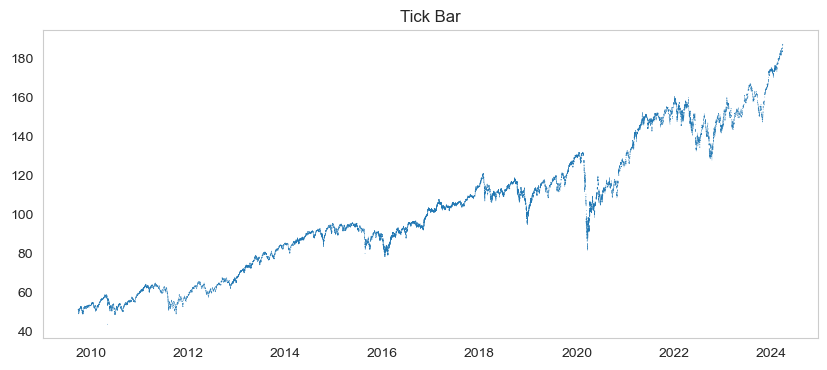

In [54]:
plt.figure(figsize = (10, 4))
plt.scatter(tick['date_time'], tick['close'], marker = '.', s = 1, edgecolor = 'none')
plt.grid(False)
plt.title('Tick Bar')
plt.show()

In [55]:
tick.to_parquet('../../Data/tick_IVEfuture.parquet')

#### Volume Bar

In [56]:
volume = bar.volume_bar(threshold = 10000)
volume

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Returning bars 


,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 09:41:53,48,50.7900,50.8500,50.7100,50.8400,10144,5364,48,5.152712e+05
1,2009-09-28 09:46:35,81,50.8500,51.0700,50.8300,51.0700,11900,9900,33,6.068960e+05
2,2009-09-28 09:47:25,106,51.0700,51.0700,51.0500,51.0600,10000,9900,25,5.106420e+05
3,2009-09-28 09:53:47,148,51.0600,51.1500,51.0600,51.1300,10824,8174,42,5.532435e+05
4,2009-09-28 09:54:34,180,51.1300,51.1400,51.1300,51.1300,10851,4451,32,5.548561e+05
...,...,...,...,...,...,...,...,...,...,...
230088,2024-03-28 15:58:21,11290844,187.0200,187.0800,186.9200,187.0400,10607,4840,68,1.983940e+06
230089,2024-03-28 15:59:32,11290915,187.0400,187.1000,186.9700,187.0400,10072,2778,71,1.883893e+06
230090,2024-03-28 15:59:53,11290999,187.0600,187.0650,186.8500,186.8500,10047,3600,84,1.878318e+06
230091,2024-03-28 16:00:00,11291062,186.8500,186.8900,186.7700,186.8100,30020,22083,63,5.608132e+06


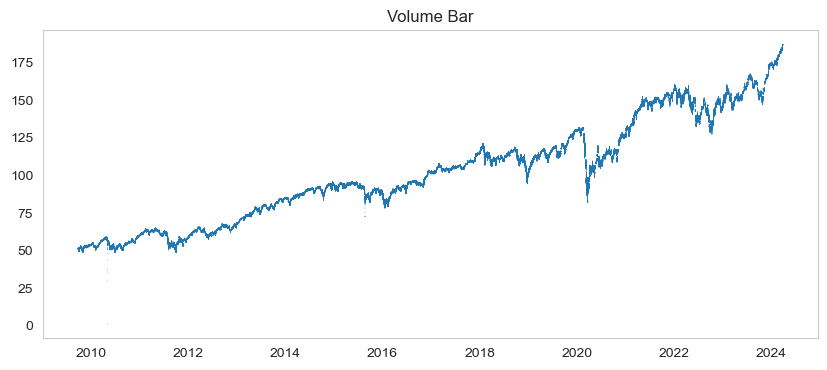

In [57]:
plt.figure(figsize = (10, 4))
plt.scatter(volume['date_time'], volume['close'], marker = '.', s = 1, edgecolor = 'none')
plt.grid(False)
plt.title('Volume Bar')
plt.show()

In [58]:
volume.to_csv('../../Data/volume_IVEfuture.csv', index = False)

#### Dollar Value Bar

In [59]:
dollar = bar.dollar_bar()
dollar

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Returning bars 


,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 09:46:34,80,50.7900,51.0700,50.7100,51.0700,20044,13264,80,1.020027e+06
1,2009-09-28 09:52:47,142,51.0700,51.1480,51.0500,51.1300,21024,19774,62,1.073986e+06
2,2009-09-28 09:54:38,201,51.1400,51.1500,51.1290,51.1300,19951,6951,59,1.020145e+06
3,2009-09-28 09:55:26,243,51.1300,51.1500,51.1300,51.1400,19652,18052,42,1.004999e+06
4,2009-09-28 10:02:48,339,51.1400,51.2600,51.0800,51.2500,19943,11354,96,1.020512e+06
...,...,...,...,...,...,...,...,...,...,...
236729,2024-03-28 15:59:53,11290981,187.0200,187.0200,186.8700,186.8900,5399,1400,46,1.009237e+06
236730,2024-03-28 15:59:56,11291032,186.8900,186.8900,186.8200,186.8200,5908,1808,51,1.103962e+06
236731,2024-03-28 15:59:59,11291059,186.8200,186.8241,186.7700,186.7700,5488,751,27,1.025128e+06
236732,2024-03-28 16:00:00,11291062,186.7700,186.8100,186.7700,186.8100,20424,20224,3,3.815399e+06


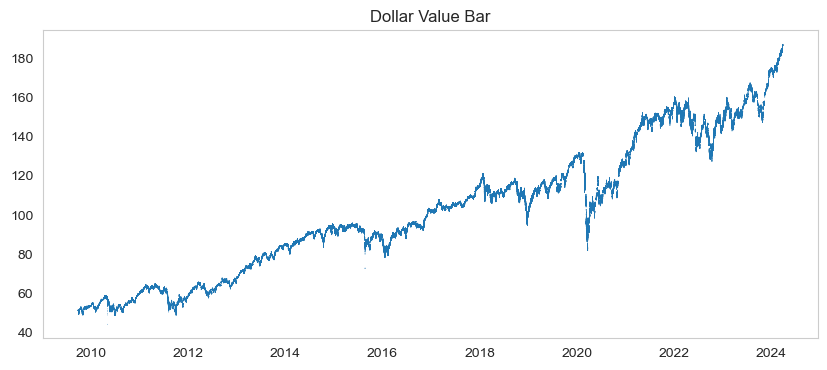

In [60]:
plt.figure(figsize = (10, 4))
plt.scatter(dollar['date_time'], dollar['close'], marker = '.', s = 1, edgecolor = 'none')
plt.grid(False)
plt.title('Dollar Value Bar')
plt.show()

In [61]:
dollar.to_csv('../../Data/dollar_IVEfuture.csv', index = False)

#### Bar Counting

In [65]:
data.index = data['date']
tick.index = tick['date_time']
volume.index = volume['date_time']
dollar.index = dollar['date_time']

In [66]:
time_count = data['price'].resample('W', label = 'right').count()
tick_count = tick['close'].resample('W', label = 'right').count()
volume_count = volume['close'].resample('W', label = 'right').count()
dollar_count = dollar['close'].resample('W', label = 'right').count()

In [67]:
count_df = pd.concat([time_count, tick_count, volume_count, dollar_count], axis = 1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']
count_df

,time,tick,volume,dollar
2009-10-04,14151,23,318,165
2009-10-11,8792,15,196,103
2009-10-18,9727,16,200,106
2009-10-25,12453,21,249,133
2009-11-01,13525,22,303,155
...,...,...,...,...
2024-03-03,8466,14,166,292
2024-03-10,11133,19,202,357
2024-03-17,13568,23,229,399
2024-03-24,8705,14,162,283


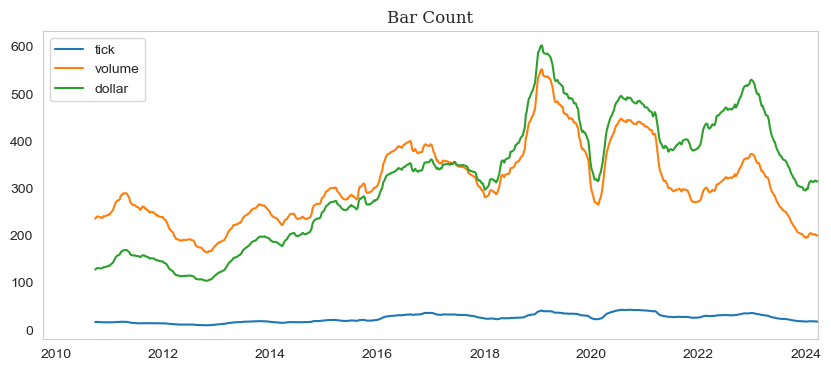

In [68]:
count_df.iloc[:,1:].rolling(window = 52).mean().plot(figsize = (10,4))
plt.title('Bar Count', fontfamily = 'Serif', fontsize = 12)
plt.grid(False)